# 0️⃣ Ejercicios típicos en Python

Estos son ejercicios que podrían preguntar en entrevistas y que conviene que sepa resolver.

🔴 Parte 1 – Lógica

Tienes esta lista:
nums = [4, 1, 7, 3, 9, 2, 8, 3, 1]

Devuelve el primer número que se repite.

1. No vale usar collections.Counter.
2. Debe ser O(n).
3. Explica por qué es O(n).

✅ Solución usando set()

In [17]:
nums = [4, 1, 7, 3, 9, 2, 8, 3, 1]
vistos = set()  # Una estructura basada en hash para almacenar elementos únicos

print(vistos)  # Muestra el set vacío

for i in nums:  # Recorre cada elemento
    if i in vistos:  # Si ya hemos visto el número
        print(i)  # Imprime el primer duplicado
        break  # Termina el bucle
    vistos.add(i)  # Añade el número al set

set()
3


Explicación:
- set() almacena elementos únicos y permite búsquedas rápidas O(1) gracias a la tabla hash.

- Cada elemento se recorre una sola vez → tiempo total O(n).

- No todos los objetos pueden ir en un set:
    - Hashables: int, float, string, tuple ✔
    - No hashables: list, dict ❌

🔹 Solución sin set()

In [18]:
nums = [4, 1, 7, 3, 9, 2, 8, 3, 1]
vistos = []

for i in nums:
    if i in vistos:  # Comprueba si ya está en la lista
        print(i)  # Primer duplicado encontrado
        break
    vistos.append(i)  # Añade el número a la lista



3


Funciona, pero más lento para listas grandes → $O(n^2)$, porque cada i in vistos recorre toda la lista vista hasta ahora.

## 1️⃣Regresión lineal con machine learning

X debe ser 2D para sklearn → (n_samples, n_features)

y = relación lineal + ruido

R²: 0.9928787475696582
Pendiente (coef_): 1.909995114327436
Intercepto (intercept_): 3.6421505501662157
Predicción para X=6: 15.102121236130833


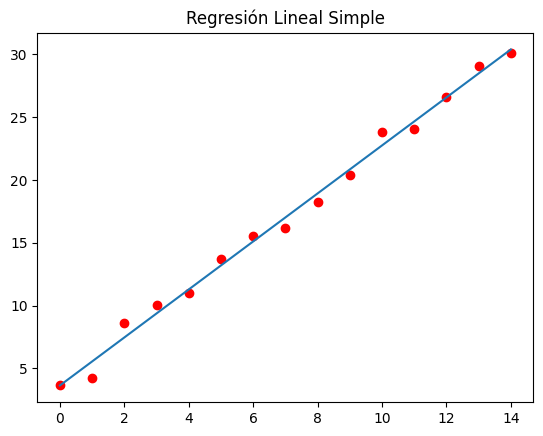

In [19]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# 1. Datos
X = np.arange(15).reshape(-1, 1)
y = 2 * X.flatten() + 3 + np.random.randn(15)

# 2. Modelo
model = LinearRegression()
model.fit(X, y)
print("R²:", model.score(X, y))


# 3. Coeficientes
print(f"Pendiente (coef_): {model.coef_[0]}")
print(f"Intercepto (intercept_): {model.intercept_}")

# 4. Predicción
X_new = np.array([[6]])
y_pred = model.predict(X_new)
print(f"Predicción para X=6: {y_pred[0]}")

# 5. Visualización
plt.scatter(X, y, color="red")
plt.plot(X, model.predict(X))
plt.title('Regresión Lineal Simple')
plt.show()